In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt

**Importing the dataset**

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
#checking the missing value
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#encoding technique
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [9]:
df.drop("User ID",axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [10]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Feature Scaling**

In [12]:
#scaling we can use standard scalar and minmax scalar
scaler = StandardScaler()
model = scaler.fit(x_train)
modified_x= model.transform(x_train)

In [13]:
scaler = StandardScaler()
model1 = scaler.fit(x_test)
modified_xt= model1.transform(x_test)

In [14]:
modified_x

array([[ 1.03637545, -0.87277077, -0.70627999],
       [-0.96490128,  0.49136855,  1.72347556],
       [-0.96490128, -0.77533224, -0.64701766],
       [ 1.03637545,  0.10161446, -0.29144368],
       [-0.96490128,  0.88112264, -1.50632145],
       [ 1.03637545, -0.48301668, -1.26927213],
       [ 1.03637545, -0.48301668, -0.88406698],
       [-0.96490128,  0.39393003,  0.98269643],
       [ 1.03637545, -0.87277077, -1.26927213],
       [-0.96490128, -0.87277077,  0.27154846],
       [-0.96490128, -1.4574019 , -0.23218135],
       [-0.96490128,  0.39393003,  2.31609887],
       [-0.96490128,  0.78368412, -1.26927213],
       [ 1.03637545, -0.97020929, -0.46923067],
       [-0.96490128,  0.68624559,  0.2419173 ],
       [-0.96490128, -1.65227894,  0.03449914],
       [-0.96490128,  0.97856116,  0.56786012],
       [-0.96490128, -0.28813963, -1.50632145],
       [ 1.03637545,  0.88112264, -0.64701766],
       [-0.96490128, -0.67789372, -1.56558378],
       [-0.96490128, -0.67789372, -0.143

**Fitting Decision Tree Classification to the Training set**

In [15]:
model=DecisionTreeClassifier()
model.fit(modified_x,y_train)

DecisionTreeClassifier()

**Predicting the Test set results**

In [16]:
model.score(modified_xt,y_test)
predicted=model.predict(modified_xt)


**Making the Confusion Matrix**

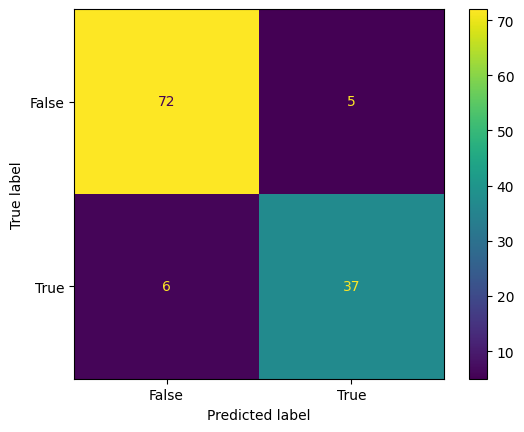

In [17]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

**Visualising the Training set results**

In [18]:
predicted1=model.predict(modified_x)
df1=pd.DataFrame(x_train)
df2=pd.DataFrame(y_train)
d_predict=pd.DataFrame(predicted1,columns=["A"])
d_predict1=pd.DataFrame(predicted,columns=["A"])

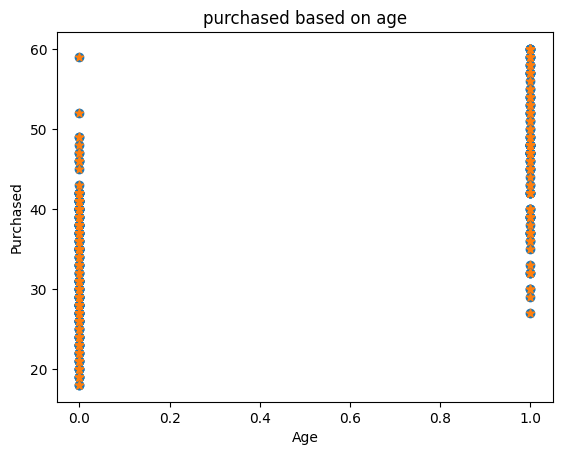

In [19]:
plt.scatter(df2,df1['Age'])
plt.scatter(d_predict["A"],df1['Age'],marker="*")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("purchased based on age")
plt.show()

Text(0.5, 1.0, 'purchased based on Gender')

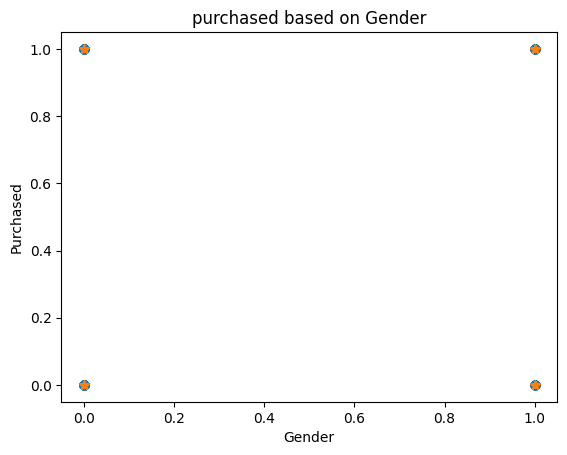

In [20]:
plt.scatter(df2,df1['Gender'])
plt.scatter(d_predict["A"],df1['Gender'],marker="*")
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.title("purchased based on Gender")

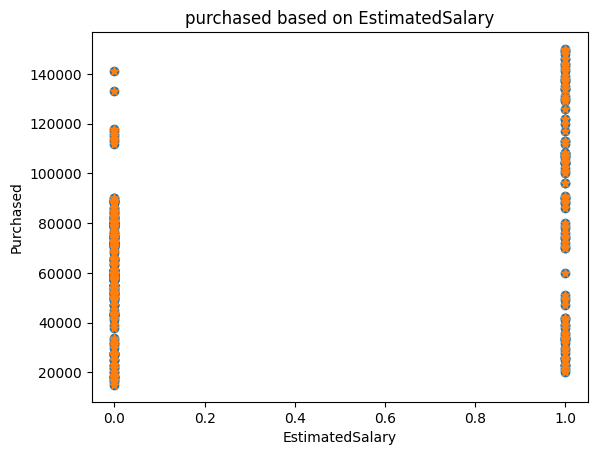

In [21]:
plt.scatter(df2,df1['EstimatedSalary'])
plt.scatter(d_predict["A"],df1['EstimatedSalary'],marker="*")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.title("purchased based on EstimatedSalary")
plt.show()

**Visualising the Test set results**

In [22]:
df3=pd.DataFrame(x_test)
df4=pd.DataFrame(y_test)

Text(0.5, 1.0, 'purchased based on age')

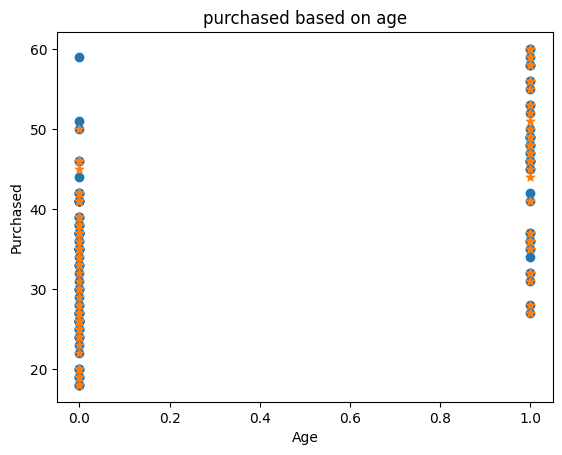

In [23]:
plt.scatter(df4,df3['Age'])
plt.scatter(d_predict1["A"],df3['Age'],marker="*")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.title("purchased based on age")

Text(0.5, 1.0, 'purchased based on Gender')

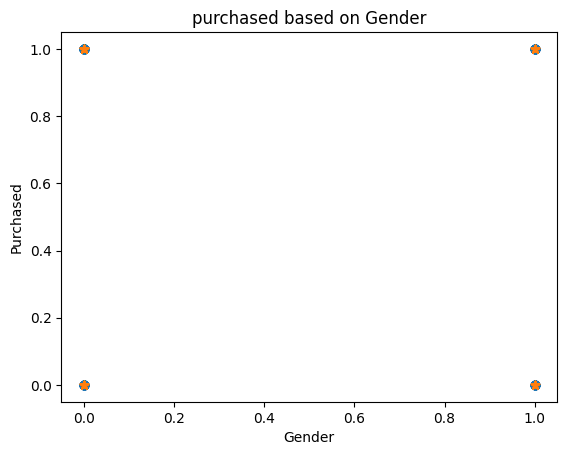

In [24]:
plt.scatter(df4,df3['Gender'])
plt.scatter(d_predict1["A"],df3['Gender'],marker="*")
plt.xlabel("Gender")
plt.ylabel("Purchased")
plt.title("purchased based on Gender")

Text(0.5, 1.0, 'purchased based on EstimatedSalary')

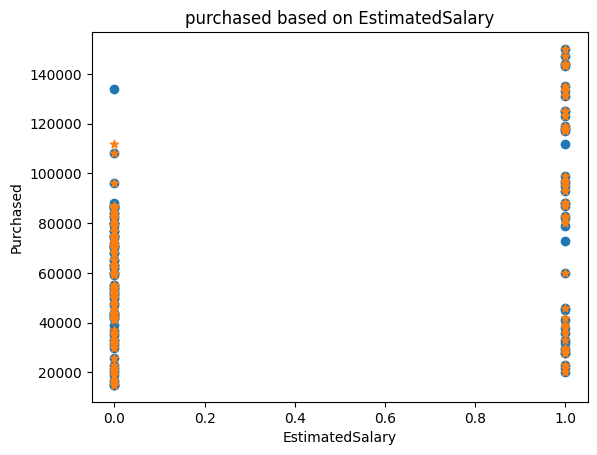

In [25]:
plt.scatter(df4,df3['EstimatedSalary'])
plt.scatter(d_predict1["A"],df3['EstimatedSalary'],marker="*")
plt.xlabel("EstimatedSalary")
plt.ylabel("Purchased")
plt.title("purchased based on EstimatedSalary")

# Conclusion

# The decision tree classification perform a score of 87% without hyperparameter tuning and the prediction on the train and test are almost the same and you can see the visualize for best understanding